# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
OPTIMIZER = [
    ('SGD', keras.optimizers.SGD),
    ('RMSprop', keras.optimizers.RMSprop),
    ('AdaGrad',keras.optimizers.adagrad),
    ('Adam', keras.optimizers.Adam)]
LEARNING_RATE = [1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256

In [10]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opt, optfun in OPTIMIZER:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with OPTIMIZER = {} and LR = {}".format(opt, lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = optfun(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-{}-lr-{}".format(opt, lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with OPTIMIZER = SGD and LR = 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.3147 - acc: 0.1076 - val_loss: 2.2965 - val_acc: 0.1233
Epoch 2/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.2871 - acc: 0.1325 - val_loss: 2.2757 - val_acc: 0.1453
Epoch 3/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.2692 - acc: 0.1496 - val_loss: 2.2600 - val_acc: 0.1618
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.2549 - acc: 0.1617 - val_loss: 2.2468 - val_acc: 0.1732
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.2426 - acc: 0.1731 - val_loss: 2.2351 - val_acc: 0.1792
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.2315 - acc: 0.1814 - val_loss: 2.2245 - val_acc: 0.1849
Epoch 7/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.2213 - acc: 0.1899 - val_loss: 2.2147 - val_acc

50000/50000 [==============================] - 5s 99us/step - loss: 2.3797 - acc: 0.0912 - val_loss: 2.3784 - val_acc: 0.0902
Epoch 3/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.3737 - acc: 0.0904 - val_loss: 2.3726 - val_acc: 0.0904
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.3682 - acc: 0.0900 - val_loss: 2.3673 - val_acc: 0.0909
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.3631 - acc: 0.0893 - val_loss: 2.3623 - val_acc: 0.0910
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.3584 - acc: 0.0888 - val_loss: 2.3577 - val_acc: 0.0905
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.3541 - acc: 0.0882 - val_loss: 2.3534 - val_acc: 0.0888
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.3500 - acc: 0.0877 - val_loss: 2.3494 - val_acc: 0.0885
Epoch 9/50
50000/50000 [========================

50000/50000 [==============================] - 6s 128us/step - loss: 1.7833 - acc: 0.3587 - val_loss: 1.8313 - val_acc: 0.3317
Epoch 4/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7118 - acc: 0.3849 - val_loss: 1.7113 - val_acc: 0.3726
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6519 - acc: 0.4101 - val_loss: 1.8398 - val_acc: 0.3440
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6032 - acc: 0.4277 - val_loss: 1.7332 - val_acc: 0.3819
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5682 - acc: 0.4389 - val_loss: 1.6997 - val_acc: 0.3921
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5318 - acc: 0.4527 - val_loss: 1.5837 - val_acc: 0.4404
Epoch 9/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5028 - acc: 0.4615 - val_loss: 1.5337 - val_acc: 0.4569
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 124us/step - loss: 1.6592 - acc: 0.4104 - val_loss: 1.7667 - val_acc: 0.3791
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6160 - acc: 0.4284 - val_loss: 1.6409 - val_acc: 0.4078
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5781 - acc: 0.4398 - val_loss: 1.7723 - val_acc: 0.3663
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5458 - acc: 0.4531 - val_loss: 1.6693 - val_acc: 0.3873
Epoch 8/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5172 - acc: 0.4644 - val_loss: 1.5721 - val_acc: 0.4380
Epoch 9/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4960 - acc: 0.4724 - val_loss: 1.5296 - val_acc: 0.4463
Epoch 10/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4682 - acc: 0.4808 - val_loss: 1.4970 - val_acc: 0.4655
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 6s 123us/step - loss: 1.8008 - acc: 0.3730 - val_loss: 1.7914 - val_acc: 0.3752
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.7735 - acc: 0.3824 - val_loss: 1.7752 - val_acc: 0.3694
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.7509 - acc: 0.3919 - val_loss: 1.7464 - val_acc: 0.3900
Epoch 8/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.7298 - acc: 0.3987 - val_loss: 1.7253 - val_acc: 0.4005
Epoch 9/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7120 - acc: 0.4042 - val_loss: 1.7098 - val_acc: 0.4050
Epoch 10/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6946 - acc: 0.4122 - val_loss: 1.7039 - val_acc: 0.4037
Epoch 11/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6802 - acc: 0.4147 - val_loss: 1.6801 - val_acc: 0.4168
Epoch 12/50
50000/50000 [==================

50000/50000 [==============================] - 5s 109us/step - loss: 1.6099 - acc: 0.4360 - val_loss: 1.6145 - val_acc: 0.4355
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5840 - acc: 0.4447 - val_loss: 1.5996 - val_acc: 0.4366
Epoch 8/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5659 - acc: 0.4518 - val_loss: 1.6192 - val_acc: 0.4227
Epoch 9/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5478 - acc: 0.4589 - val_loss: 1.6588 - val_acc: 0.4107
Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5330 - acc: 0.4638 - val_loss: 1.5715 - val_acc: 0.4437
Epoch 11/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5178 - acc: 0.4695 - val_loss: 1.5546 - val_acc: 0.4490
Epoch 12/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5048 - acc: 0.4737 - val_loss: 1.5593 - val_acc: 0.4478
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 6s 118us/step - loss: 1.8093 - acc: 0.3716 - val_loss: 1.8058 - val_acc: 0.3744
Epoch 8/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7989 - acc: 0.3736 - val_loss: 1.7964 - val_acc: 0.3783
Epoch 9/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7895 - acc: 0.3775 - val_loss: 1.7885 - val_acc: 0.3775
Epoch 10/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7811 - acc: 0.3791 - val_loss: 1.7804 - val_acc: 0.3808
Epoch 11/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7737 - acc: 0.3829 - val_loss: 1.7730 - val_acc: 0.3834
Epoch 12/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7666 - acc: 0.3856 - val_loss: 1.7674 - val_acc: 0.3803
Epoch 13/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7603 - acc: 0.3874 - val_loss: 1.7604 - val_acc: 0.3838
Epoch 14/50
50000/50000 [================

50000/50000 [==============================] - 6s 112us/step - loss: 2.1576 - acc: 0.2606 - val_loss: 2.1501 - val_acc: 0.2676
Epoch 9/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.1487 - acc: 0.2637 - val_loss: 2.1416 - val_acc: 0.2730
Epoch 10/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1406 - acc: 0.2688 - val_loss: 2.1339 - val_acc: 0.2743
Epoch 11/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.1331 - acc: 0.2700 - val_loss: 2.1267 - val_acc: 0.2780
Epoch 12/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.1261 - acc: 0.2739 - val_loss: 2.1200 - val_acc: 0.2810
Epoch 13/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1197 - acc: 0.2768 - val_loss: 2.1140 - val_acc: 0.2846
Epoch 14/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1138 - acc: 0.2771 - val_loss: 2.1083 - val_acc: 0.2843
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 8s 160us/step - loss: 1.3836 - acc: 0.5054 - val_loss: 1.4483 - val_acc: 0.4829
Epoch 10/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.3579 - acc: 0.5175 - val_loss: 1.4188 - val_acc: 0.4933
Epoch 11/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.3304 - acc: 0.5271 - val_loss: 1.4330 - val_acc: 0.4951
Epoch 12/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.3053 - acc: 0.5354 - val_loss: 1.3959 - val_acc: 0.5056
Epoch 13/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.2814 - acc: 0.5439 - val_loss: 1.3811 - val_acc: 0.5106
Epoch 14/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.2620 - acc: 0.5500 - val_loss: 1.3990 - val_acc: 0.5041
Epoch 15/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2463 - acc: 0.5560 - val_loss: 1.3961 - val_acc: 0.5105
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 8s 169us/step - loss: 1.3729 - acc: 0.5187 - val_loss: 1.4389 - val_acc: 0.4847
Epoch 11/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.3554 - acc: 0.5229 - val_loss: 1.4057 - val_acc: 0.5007
Epoch 12/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.3324 - acc: 0.5314 - val_loss: 1.3964 - val_acc: 0.5081
Epoch 13/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.3120 - acc: 0.5398 - val_loss: 1.3997 - val_acc: 0.5029
Epoch 14/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.2891 - acc: 0.5457 - val_loss: 1.3777 - val_acc: 0.5168
Epoch 15/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.2775 - acc: 0.5502 - val_loss: 1.3990 - val_acc: 0.5007
Epoch 16/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.2528 - acc: 0.5620 - val_loss: 1.3906 - val_acc: 0.5068
Epoch 17/50
50000/50000 [==============

50000/50000 [==============================] - 8s 152us/step - loss: 1.6606 - acc: 0.4235 - val_loss: 1.6652 - val_acc: 0.4234
Epoch 12/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.6453 - acc: 0.4310 - val_loss: 1.6520 - val_acc: 0.4270
Epoch 13/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6319 - acc: 0.4339 - val_loss: 1.6412 - val_acc: 0.4291
Epoch 14/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6187 - acc: 0.4382 - val_loss: 1.6270 - val_acc: 0.4304
Epoch 15/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6068 - acc: 0.4419 - val_loss: 1.6213 - val_acc: 0.4250
Epoch 16/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5951 - acc: 0.4462 - val_loss: 1.6064 - val_acc: 0.4395
Epoch 17/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5851 - acc: 0.4503 - val_loss: 1.6006 - val_acc: 0.4393
Epoch 18/50
50000/50000 [==============

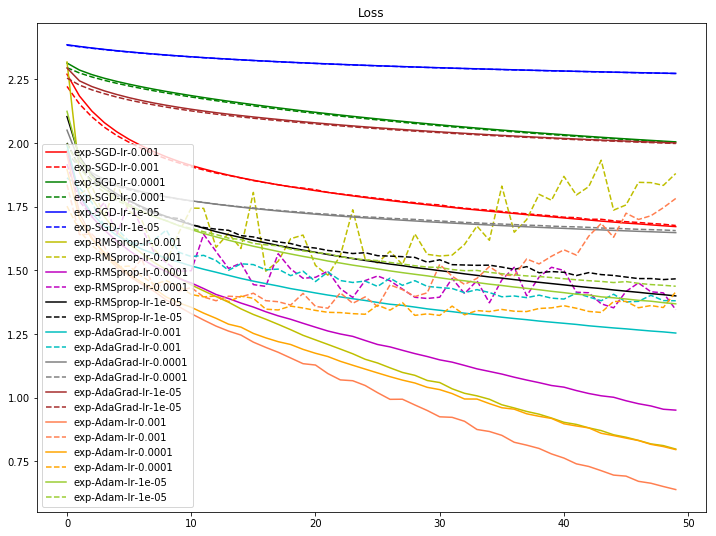

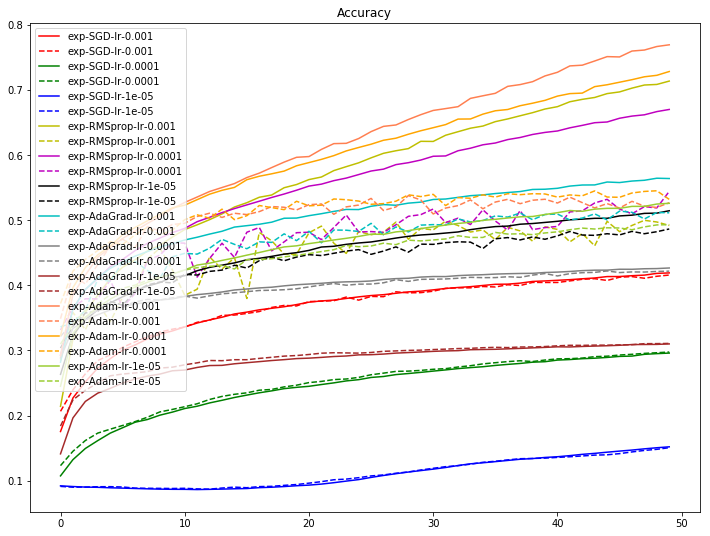

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "gray", "brown", "coral", "orange", "yellowgreen"]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()